<a href="https://colab.research.google.com/github/dutta-arka/Resonance-Capture-of-Planets/blob/main/RTP%3B_Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Load the CSV file without column names and directly starting from the data
df = pd.read_csv("E6.csv", header=None)

# Remove empty rows
df.dropna(inplace=True)

# Add column names
df.columns = ['Planetary System', 'Orbital Period [days]', 'Semi-major Axis [au]', 'Eccentricity', 'Planet Mass or Mass*sin(i) [Earth Mass]']

# Sort the data by column 1 (A to Z)
df.sort_values(by='Planetary System', inplace=True)

# Define a function to calculate correlation coefficients
def calculate_correlation_coefficients(data):
    correlations = np.corrcoef(data, rowvar=False)
    return correlations

# Define the columns representing different orbital parameters
orbital_parameters = ['Orbital Period [days]', 'Semi-major Axis [au]', 'Eccentricity', 'Planet Mass or Mass*sin(i) [Earth Mass]']

# Initialize a list to store correlation matrices for each planetary system
correlation_matrices = []

# Iterate over each planetary system
for index, row in df.iterrows():
    # Extract data for the orbital parameters
    data = [row[param] for param in orbital_parameters]
    # Calculate correlation coefficients
    correlations = calculate_correlation_coefficients(data)
    # Append correlation matrix to the list
    correlation_matrices.append(correlations)

# Add correlation matrices to DataFrame (optional)
df['Correlation Matrices'] = correlation_matrices

# Display the DataFrame
print(df)

     Planetary System  Orbital Period [days]  Semi-major Axis [au]  \
1              47 UMa            1078.000000               804.080   
2              47 UMa            2391.000000               171.621   
3              47 UMa           14002.000000               521.220   
4              55 Cnc              14.651600               255.400   
5              55 Cnc              44.398900                51.200   
...               ...                    ...                   ...   
1097          tau Cet             636.130000                 3.930   
1099          tau Cet              49.410000                 1.830   
1101          ups And             241.258000               629.595   
1100          ups And               4.617033               218.531   
1102          ups And            1276.460000              1313.220   

      Eccentricity  Planet Mass or Mass*sin(i) [Earth Mass]  \
1         2.100000                                   0.0320   
2         3.600000               

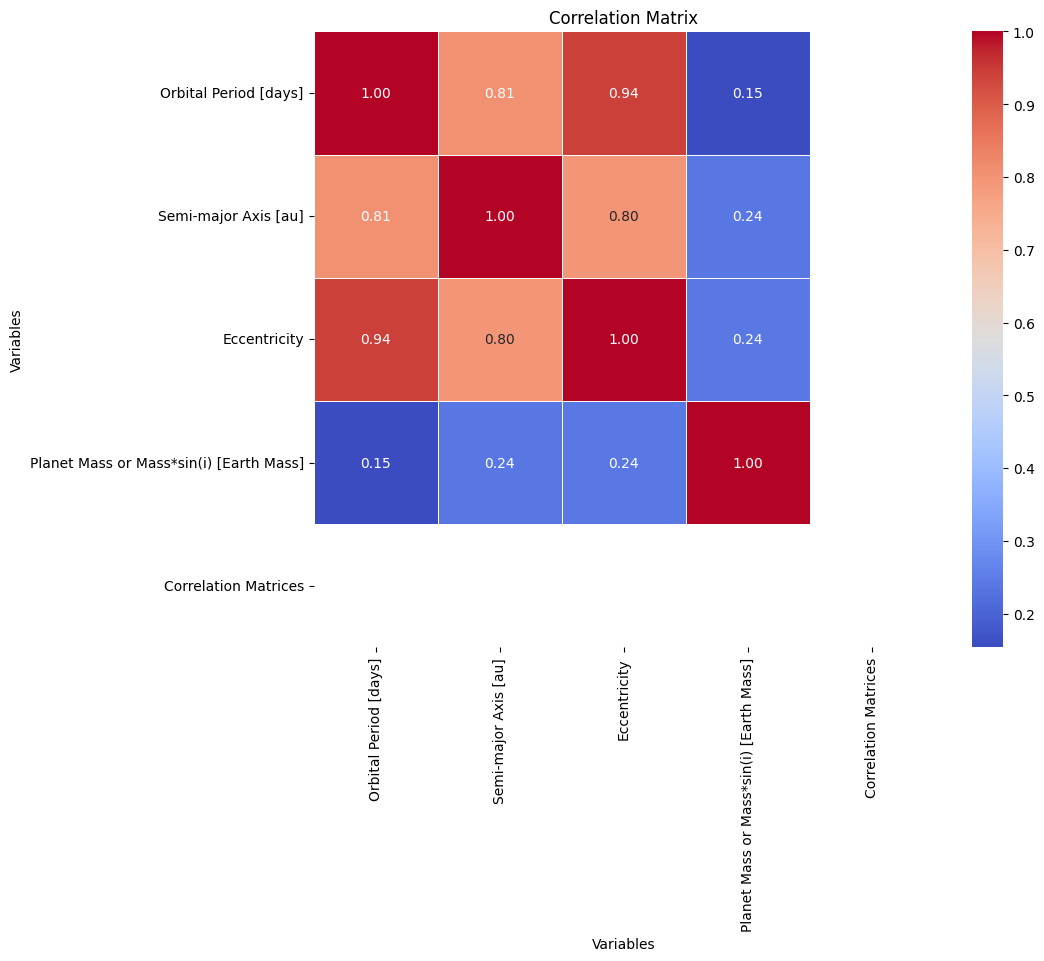

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show plot
plt.show()